<a href="https://colab.research.google.com/github/Artenida/computer-vision-exercises/blob/main/Exercise2_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

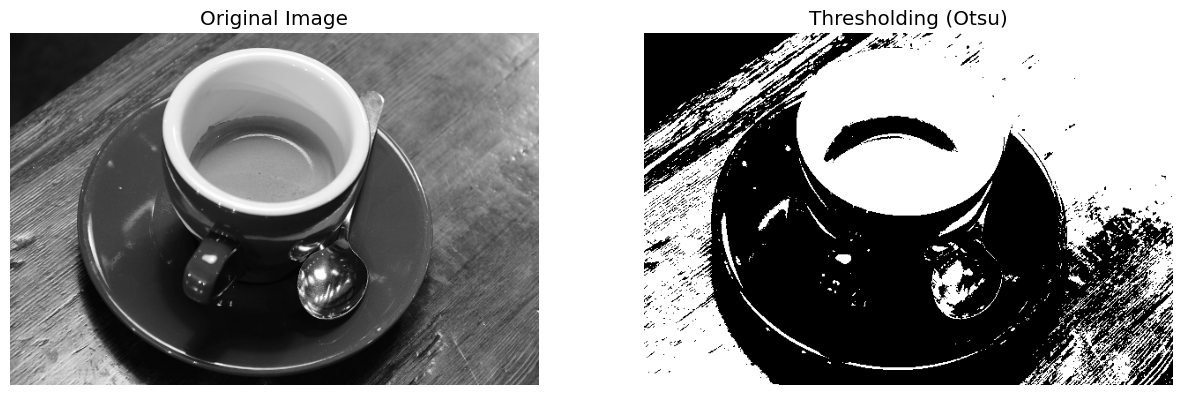

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu

plt.style.use('ggplot')

img = data.coffee()

# Apply thresholding, Otsu's method
#gray_image = img
gray_image = color.rgb2gray(img)  # values in [0,1]

thresh = threshold_otsu(gray_image)
binary = gray_image > thresh

# Show all results
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(binary, cmap='gray')
ax[1].set_title("Thresholding (Otsu)")
ax[1].axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

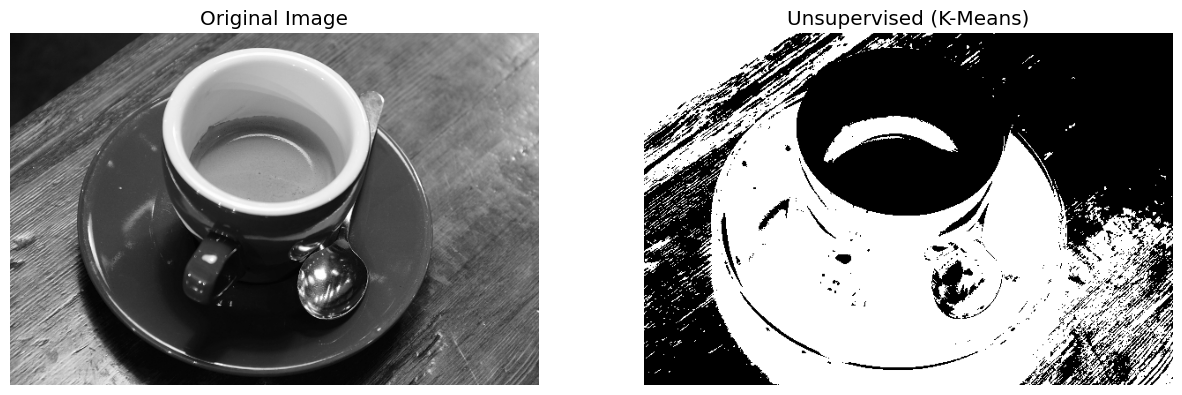

In [41]:
from skimage import color
from sklearn.cluster import KMeans

# Apply unsupervised segmentation (K-Means)
image_rgb = color.gray2rgb(gray_image)
pixels = image_rgb.reshape(-1, 3)
kmeans = KMeans(n_clusters=2, random_state=42).fit(pixels)
kmeans_labels = kmeans.labels_.reshape(image_rgb.shape[:2])

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(kmeans_labels, cmap='gray')
ax[1].set_title("Unsupervised (K-Means)")
ax[1].axis('off')

**QDA**

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


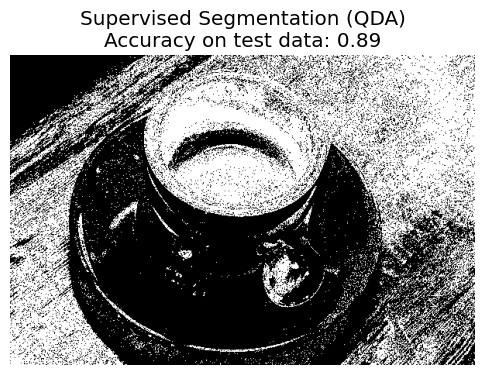

In [42]:
from skimage import filters
from skimage.util import img_as_float
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Convert grayscale image to RGB for model input
image_rgb = color.gray2rgb(gray_image)
X = image_rgb.reshape(-1, 3)
y = binary.reshape(-1).astype(int)

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Train QDA classifier
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predict and reshape result
qda_pred = qda.predict(X).reshape(gray_image.shape)

# Evaluate accuracy on test data
qda_test_pred = qda.predict(X_test)
qda_accuracy = accuracy_score(y_test, qda_test_pred)

# Display segmentation result
plt.figure(figsize=(6, 6))
plt.imshow(qda_pred, cmap='gray')
plt.title(f"Supervised Segmentation (QDA)\nAccuracy on test data: {qda_accuracy:.2f}")
plt.axis('off')
plt.show()


**LDA**

LDA Test Accuracy: 0.99


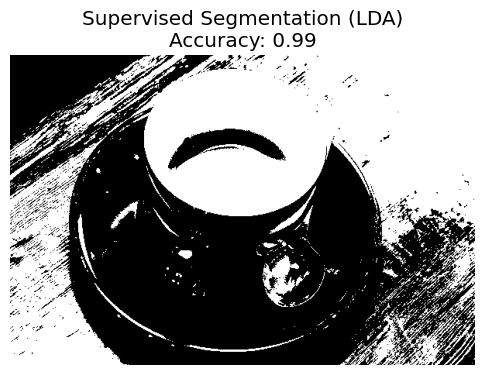

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.filters import threshold_otsu
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert grayscale to RGB
image_rgb = color.gray2rgb(gray_image)
X = image_rgb.reshape(-1, 3)               # Features: RGB
y = binary.reshape(-1).astype(int)         # Labels: 0 or 1 from Otsu

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on full image and reshape
lda_pred = lda.predict(X).reshape(gray_image.shape)

# Accuracy on test set
lda_test_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, lda_test_pred)
print(f"LDA Test Accuracy: {accuracy:.2f}")

# Show result
plt.figure(figsize=(6, 6))
plt.imshow(lda_pred, cmap='gray')
plt.title(f"Supervised Segmentation (LDA)\nAccuracy: {accuracy:.2f}")
plt.axis('off')
plt.show()
